### Brief EDA of avocado dataset with the aim of predicting the average price of avocados based on the most impactful features.

#### Read the dataset avocado.csv 
#### Save it in a variable called df. 
#### Use the basic EDA to analyze the dataset.

In [187]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
import scipy.stats as stats

In [188]:
df = pd.read_csv("avocado.csv")

In [189]:
df.head(10)


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,6/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,22-11-2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,15-11-2015,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,8/11/2015,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,1/11/2015,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,25-10-2015,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [191]:
df.describe()


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [192]:
df.shape


(18249, 14)

In [193]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

#### Drop unnecessary and erroneous columns from the df. 
#### Do some feature engineering on the "date" column so I can add and use day and the month columns in
#### building ML model later.

In [194]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [195]:
df["Date"] = pd.to_datetime(df["Date"])

In [196]:
df["Month"] = df["Date"].apply(lambda x: x.month)
df["Day"] = df["Date"].apply(lambda x: x.day)

In [197]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


#### Plot the df average price through the Date column.

In [198]:
price_by_date = df.groupby("Date")["AveragePrice"].mean()

In [199]:
price_by_date

Date
2015-01-02    1.247037
2015-01-03    1.311019
2015-01-11    1.304907
2015-01-18    1.391111
2015-01-25    1.397130
                ...   
2018-04-02    1.234074
2018-04-03    1.350185
2018-07-01    1.357778
2018-11-02    1.307037
2018-11-03    1.335093
Name: AveragePrice, Length: 169, dtype: float64

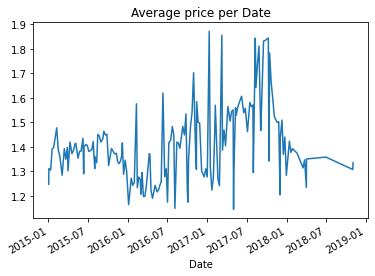

In [200]:
price_by_date.plot()
plt.title("Average price per Date")
plt.show()

#### Get the correlation matrix and plot it for all the numerical columns in the dataframe.

#### Which variables are the most correlated with the AveragePrice? 

#### Which variables are highly correlated with others?

In [201]:
corr = df.corr()

In [202]:
corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.075134,0.061157
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.015344,-0.013212
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.014522,-0.014375
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.015892,-0.014567
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.024220,-0.012446
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.013061,-0.008687
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.012432,-0.007999
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.014330,-0.010477
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.006182,-0.002364
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.098812,-0.026504


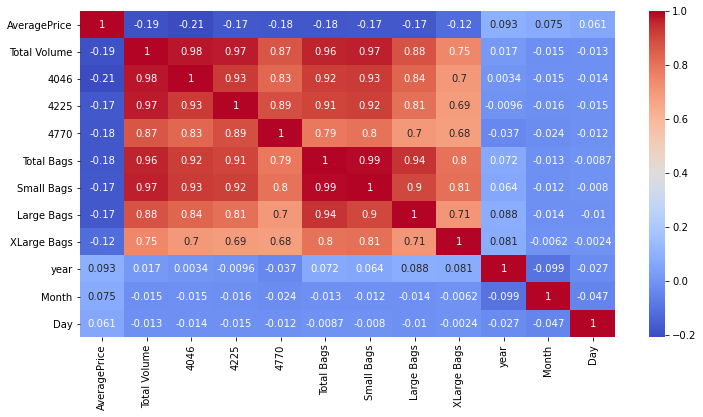

In [203]:
plt.figure(figsize=(12,6))
sns.heatmap(corr, cmap="coolwarm", annot = True)
plt.show()

In [204]:
corr[(corr > 0.5) | (corr < -0.5)]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Volume,NaN,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,NaN,NaN,NaN
4046,NaN,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,NaN,NaN,NaN
4225,NaN,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,NaN,NaN,NaN
4770,NaN,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,NaN,NaN,NaN
Total Bags,NaN,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,NaN,NaN,NaN
Small Bags,NaN,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,NaN,NaN,NaN
Large Bags,NaN,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,NaN,NaN,NaN
XLarge Bags,NaN,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,NaN,NaN,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


#### Build a function to see if a specific column follows a normal distribution.

#### If not, using the Box-Cox or Yeo-Johnson transform them to follow a normal distribution. 

#### Save dataset as df_norm.

In [205]:
df_final = pd.get_dummies(df.drop(["region","Date"], axis=1),drop_first =  True)

In [206]:
df_final.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,6,12,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


In [207]:
import scipy.stats as stats

In [208]:
def assert_normality(data):
    stat, p_val = stats.shapiro(data)
    if p_val > 0.05:
        print("Normal")
        return True
    else:
        print("Not normal")
        return False

In [209]:
for column in df_final.columns:
    print(column+"\n")
    assert_normality(df_final[column])
    print("\n")

AveragePrice

Not normal


Total Volume

Not normal


4046

Not normal


4225

Not normal


4770

Not normal


Total Bags

Not normal


Small Bags

Not normal


Large Bags

Not normal


XLarge Bags

Not normal


year

Not normal


Month

Not normal


Day

Not normal


type_organic

Not normal




In [210]:
for column in df_final.columns:
    df_final[column] = df_final[column].astype(float)
    df_final[column] = stats.yeojohnson(df_final[column])[0]

In [211]:
df_norm = df_final

#### Retrieve the best 5 variables. Use them to predict the average price for the avocados.

In [212]:
from sklearn import linear_model
from sklearn.feature_selection import RFE

In [213]:
X = df_norm.drop("AveragePrice", axis=1)
y = df_norm["AveragePrice"]

In [214]:
lr = linear_model.LinearRegression()
rfe = RFE(lr, n_features_to_select=5)
rfe.fit(X,y)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [215]:
print(sorted(zip(map(lambda x: round(x,4), rfe.ranking_), X.columns)))

[(1, 'Small Bags'), (1, 'Total Bags'), (1, 'Total Volume'), (1, 'type_organic'), (1, 'year'), (2, '4225'), (3, 'Month'), (4, 'Day'), (5, 'Large Bags'), (6, '4770'), (7, 'XLarge Bags'), (8, '4046')]


#### Divide  data into a training and a test dataset. 

#### Use the best 5 variables to predict the average price for the avocados.

#### Get the MSE, MAE y RSME for the model.

In [216]:
X = df_norm[["4225", "Total Bags", "Total Volume", "type_organic", "year"]]
y = df_norm["AveragePrice"]

In [217]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

In [218]:
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [219]:
pred

array([0.77065372, 0.72585106, 0.79997516, ..., 0.67076015, 0.85008287,
       0.65141368])

In [224]:
from sklearn import metrics
from math import sqrt

In [225]:
print("MAE", metrics.mean_absolute_error(y_test,pred))
print("MSE", metrics.mean_squared_error(y_test,pred))
print("RMSE", sqrt(metrics.mean_squared_error(y_test,pred)))

MAE 0.07033277524701834
MSE 0.007991891808050277
RMSE 0.0893973814384419
